# PCA (Principal Component Analysis) with the Speed Dating Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from sklearn.decomposition import PCA

## Exploratory Data Analysis

In [5]:
sd = pd.read_csv('../datasets/speed_dating.csv')

In [7]:
sd.shape

(551, 29)

In [8]:
sd.head()

subject_id  wave  like_sports  like_tvsports  like_exercise  like_food  \
0           1     1          9.0            2.0            8.0        9.0   
1           2     1          3.0            2.0            7.0       10.0   
2           3     1          3.0            8.0            7.0        8.0   
3           4     1          1.0            1.0            6.0        7.0   
4           5     1          7.0            4.0            7.0        7.0   

   like_museums  like_art  like_hiking  like_gaming  ...  \
0           1.0       1.0          5.0          1.0  ...   
1           8.0       6.0          3.0          5.0  ...   
2           5.0       5.0          8.0          4.0  ...   
3           6.0       7.0          7.0          5.0  ...   
4           6.0       8.0          6.0          6.0  ...   

   subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        6.0                   8.0                      8.0   
1                        7.0                   5.0                      8.0   
2                        8.0                   9.0                      9.0   
3                        7.0                   8.0                      7.0   
4                        6.0                   3.0                     10.0   

   subjective_fun  subjective_ambition  objective_attractiveness  \
0             8.0                  7.0                       NaN   
1            10.0                  3.0                       NaN   
2             8.0                  8.0                       NaN   
3             9.0                  8.0                       NaN   
4             6.0                  8.0                       NaN   

   objective_sincerity  objective_intelligence  objective_fun  \
0                  NaN                     NaN            NaN   
1                  NaN                     NaN            NaN   
2                  NaN                     NaN            NaN   
3                  NaN                     NaN            NaN   
4                  NaN                     NaN            NaN   

   objective_ambition  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [9]:
sd.dtypes

subject_id                     int64
wave                           int64
like_sports                  float64
like_tvsports                float64
like_exercise                float64
like_food                    float64
like_museums                 float64
like_art                     float64
like_hiking                  float64
like_gaming                  float64
like_clubbing                float64
like_reading                 float64
like_tv                      float64
like_theater                 float64
like_movies                  float64
like_concerts                float64
like_music                   float64
like_shopping                float64
like_yoga                    float64
subjective_attractiveness    float64
subjective_sincerity         float64
subjective_intelligence      float64
subjective_fun               float64
subjective_ambition          float64
objective_attractiveness     float64
objective_sincerity          float64
objective_intelligence       float64
o

In [11]:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [13]:
sd.shape

(551, 24)

In [12]:
sd.drop(['objective_attractiveness',
        'objective_sincerity',
        'objective_intelligence',
        'objective_fun',
        'objective_ambition'],
       axis=1, inplace=True)

In [14]:
sd.dropna(inplace=True)

In [16]:
sd.shape

(542, 24)

In [19]:
sd.isnull().sum().sum()

0

In [21]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 550
Data columns (total 24 columns):
subject_id                   542 non-null int64
wave                         542 non-null int64
like_sports                  542 non-null float64
like_tvsports                542 non-null float64
like_exercise                542 non-null float64
like_food                    542 non-null float64
like_museums                 542 non-null float64
like_art                     542 non-null float64
like_hiking                  542 non-null float64
like_gaming                  542 non-null float64
like_clubbing                542 non-null float64
like_reading                 542 non-null float64
like_tv                      542 non-null float64
like_theater                 542 non-null float64
like_movies                  542 non-null float64
like_concerts                542 non-null float64
like_music                   542 non-null float64
like_shopping                542 non-null float64

In [30]:
### Are the subjective columns correlated?

subjective_cols = [col for col in sd.columns if col.startswith('subjective')]

print(subjective_cols)

subjective = sd[subjective_cols]

### subjective Z-scores
subjective = (subjective - subjective.mean()) / subjective.std()

['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition']


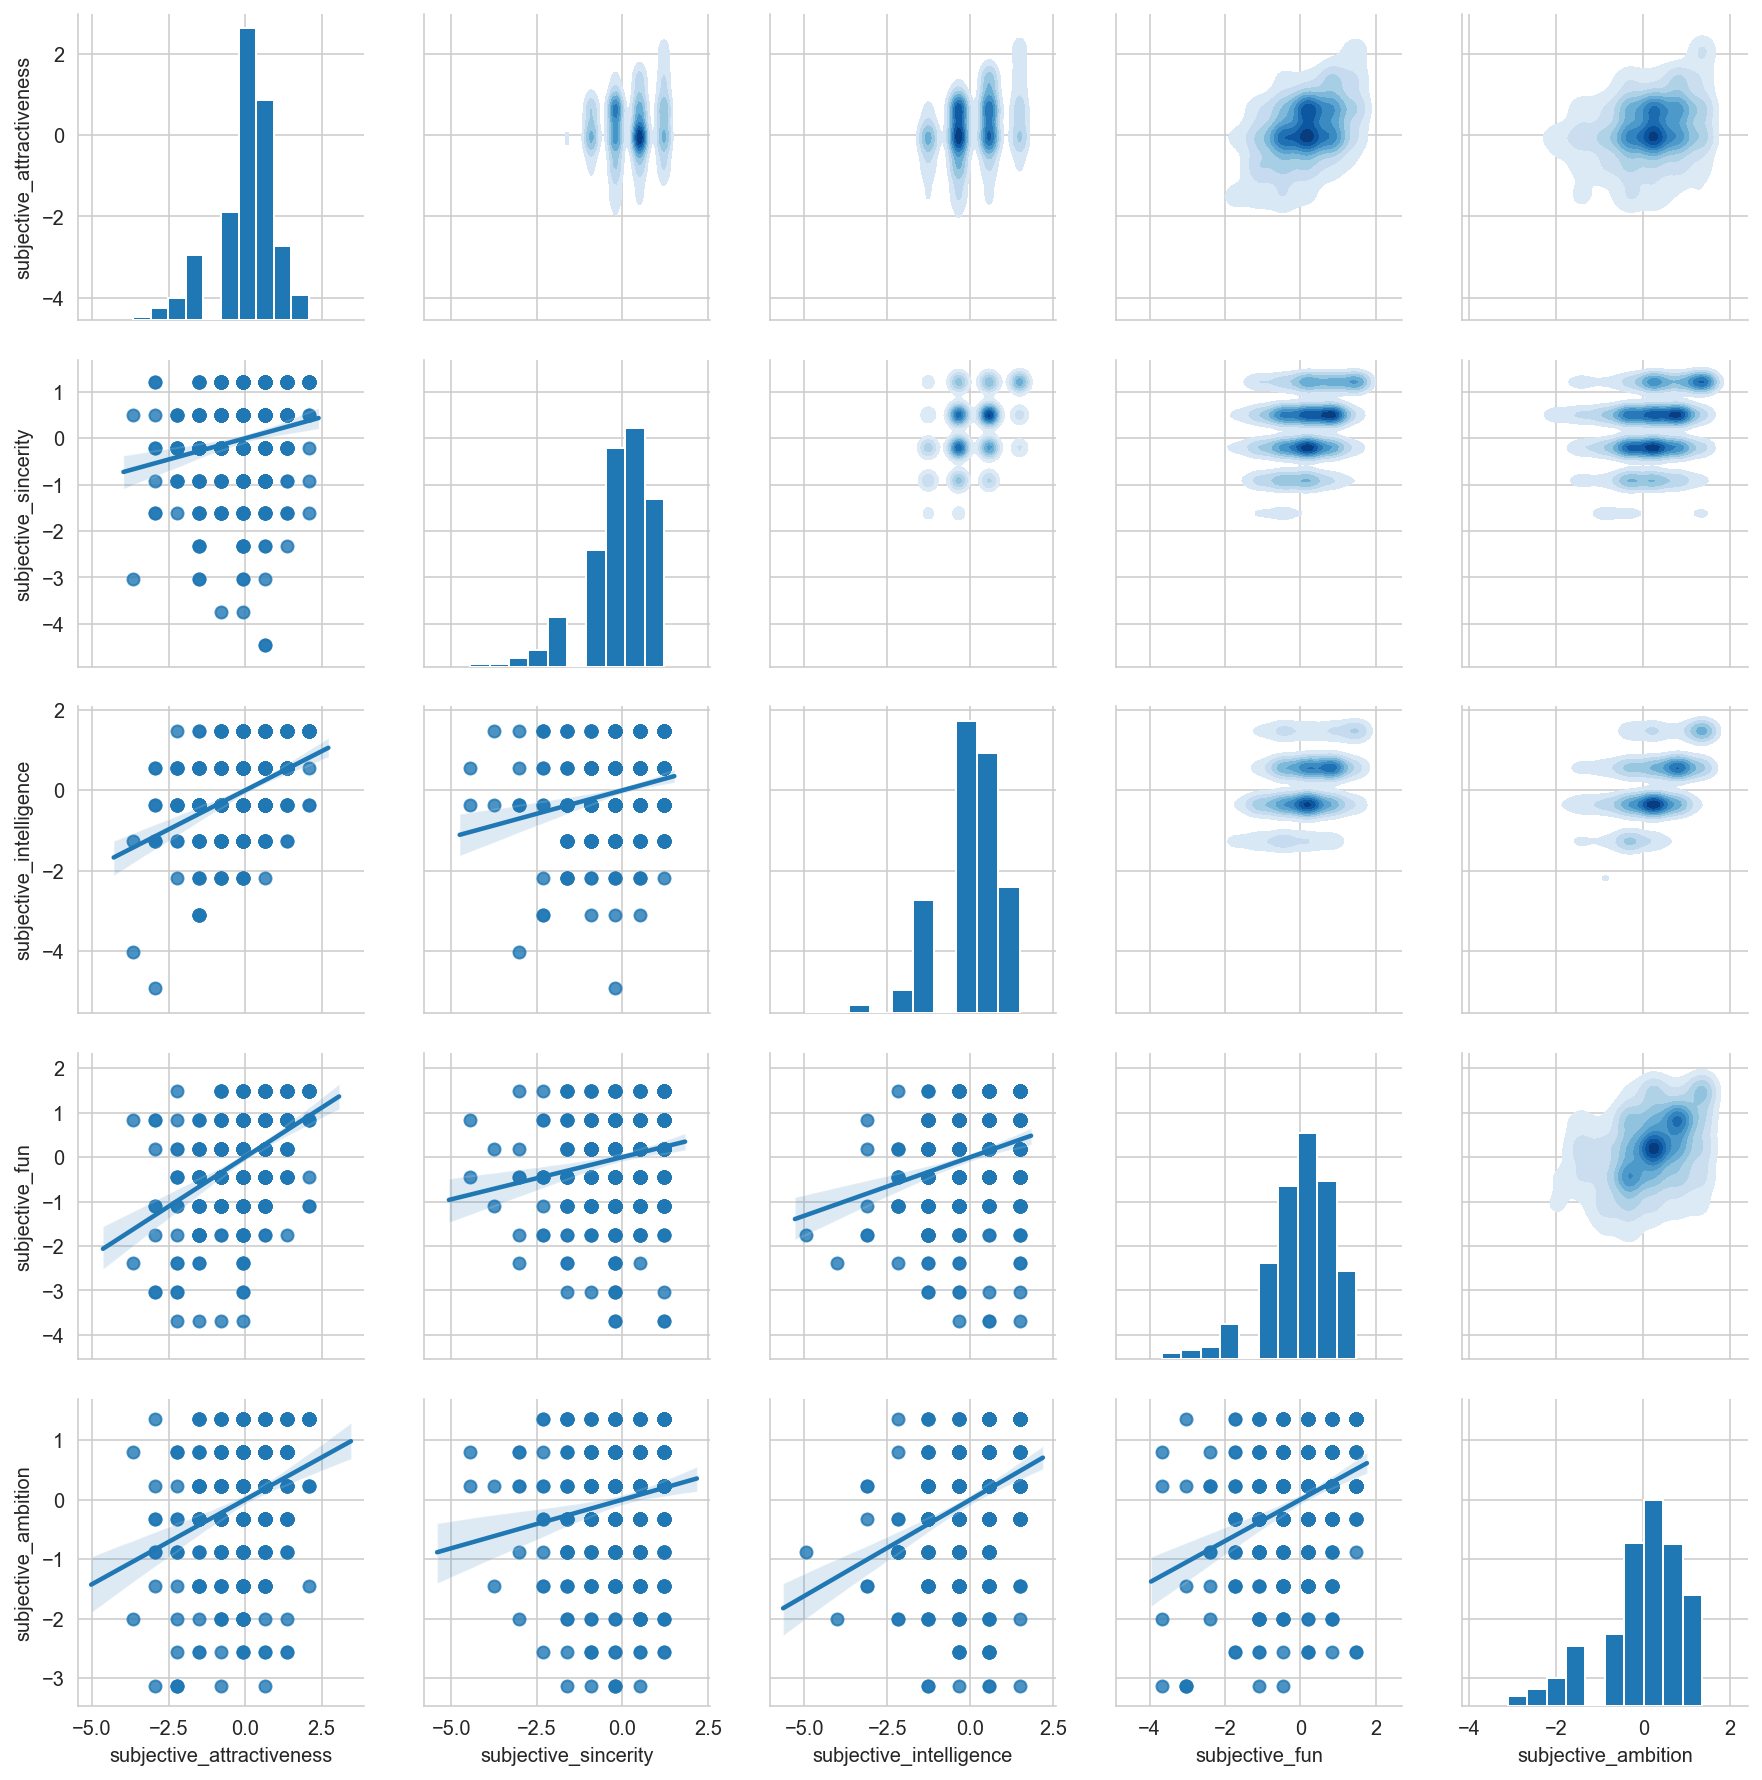

In [26]:
g = sns.PairGrid(subjective)

g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

In [31]:
subj_corr = subjective.corr()

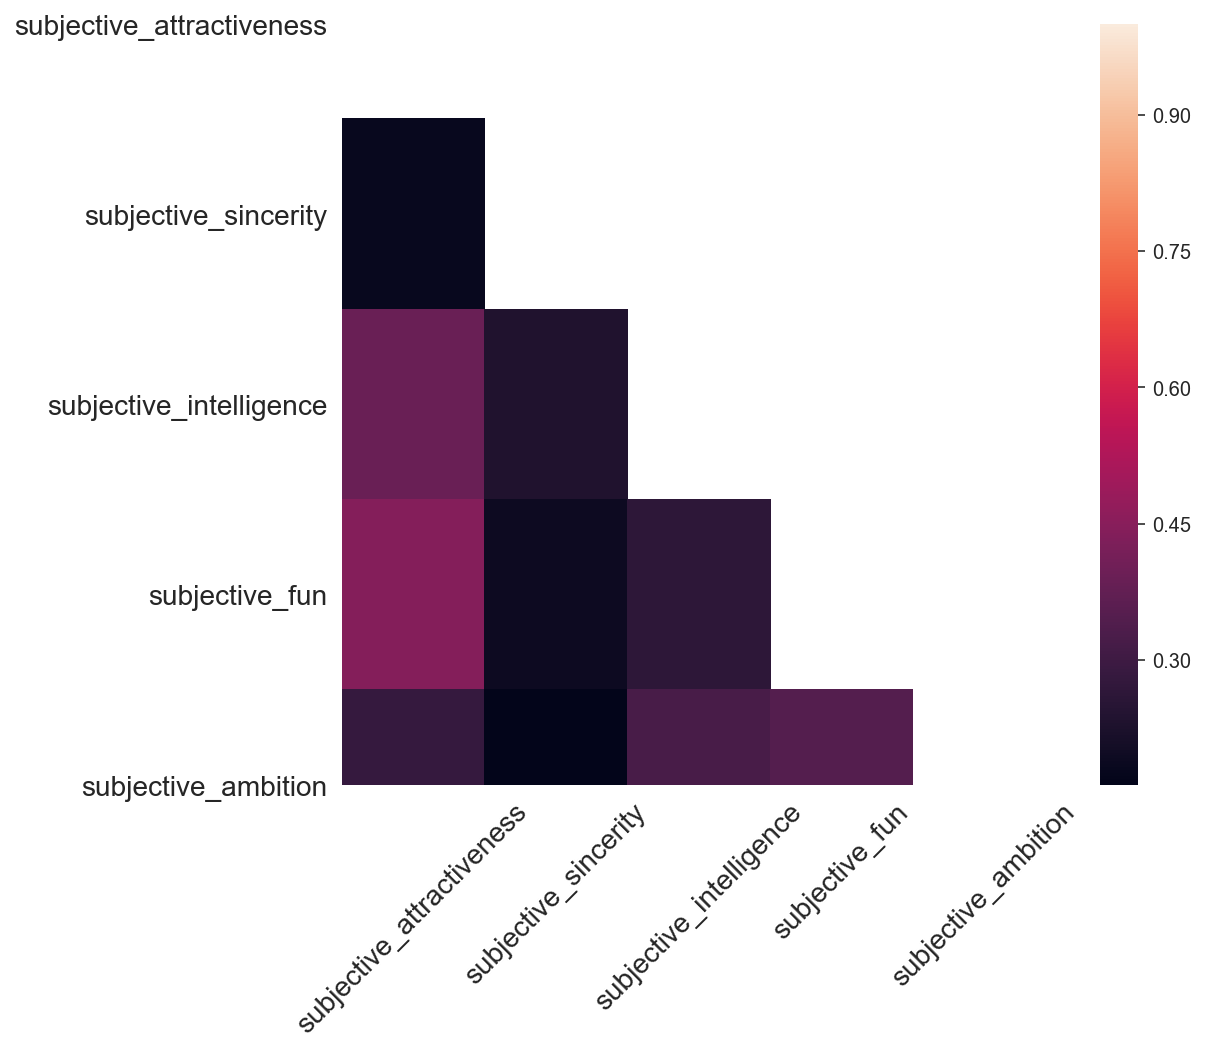

In [32]:
mask = np.zeros_like(subj_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

ax = sns.heatmap(subj_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

In [33]:
subj_corr

subjective_attractiveness  subjective_sincerity  \
subjective_attractiveness                   1.000000              0.182410   
subjective_sincerity                        0.182410              1.000000   
subjective_intelligence                     0.390144              0.233328   
subjective_fun                              0.444195              0.189761   
subjective_ambition                         0.283712              0.163047   

                           subjective_intelligence  subjective_fun  \
subjective_attractiveness                 0.390144        0.444195   
subjective_sincerity                      0.233328        0.189761   
subjective_intelligence                   1.000000        0.263585   
subjective_fun                            0.263585        1.000000   
subjective_ambition                       0.323155        0.346745   

                           subjective_ambition  
subjective_attractiveness             0.283712  
subjective_sincerity                  0.163047  
subjective_intelligence               0.323155  
subjective_fun                        0.346745  
subjective_ambition                   1.000000

In [38]:
### Are the preference (like) columns correlated?

preference_cols = [col for col in sd.columns if col.startswith ('like')]

print(preference_cols)

preference = sd[preference_cols]

### preference Z-scores
preference = (preference - preference.mean())/preference.std()

['like_sports', 'like_tvsports', 'like_exercise', 'like_food', 'like_museums', 'like_art', 'like_hiking', 'like_gaming', 'like_clubbing', 'like_reading', 'like_tv', 'like_theater', 'like_movies', 'like_concerts', 'like_music', 'like_shopping', 'like_yoga']


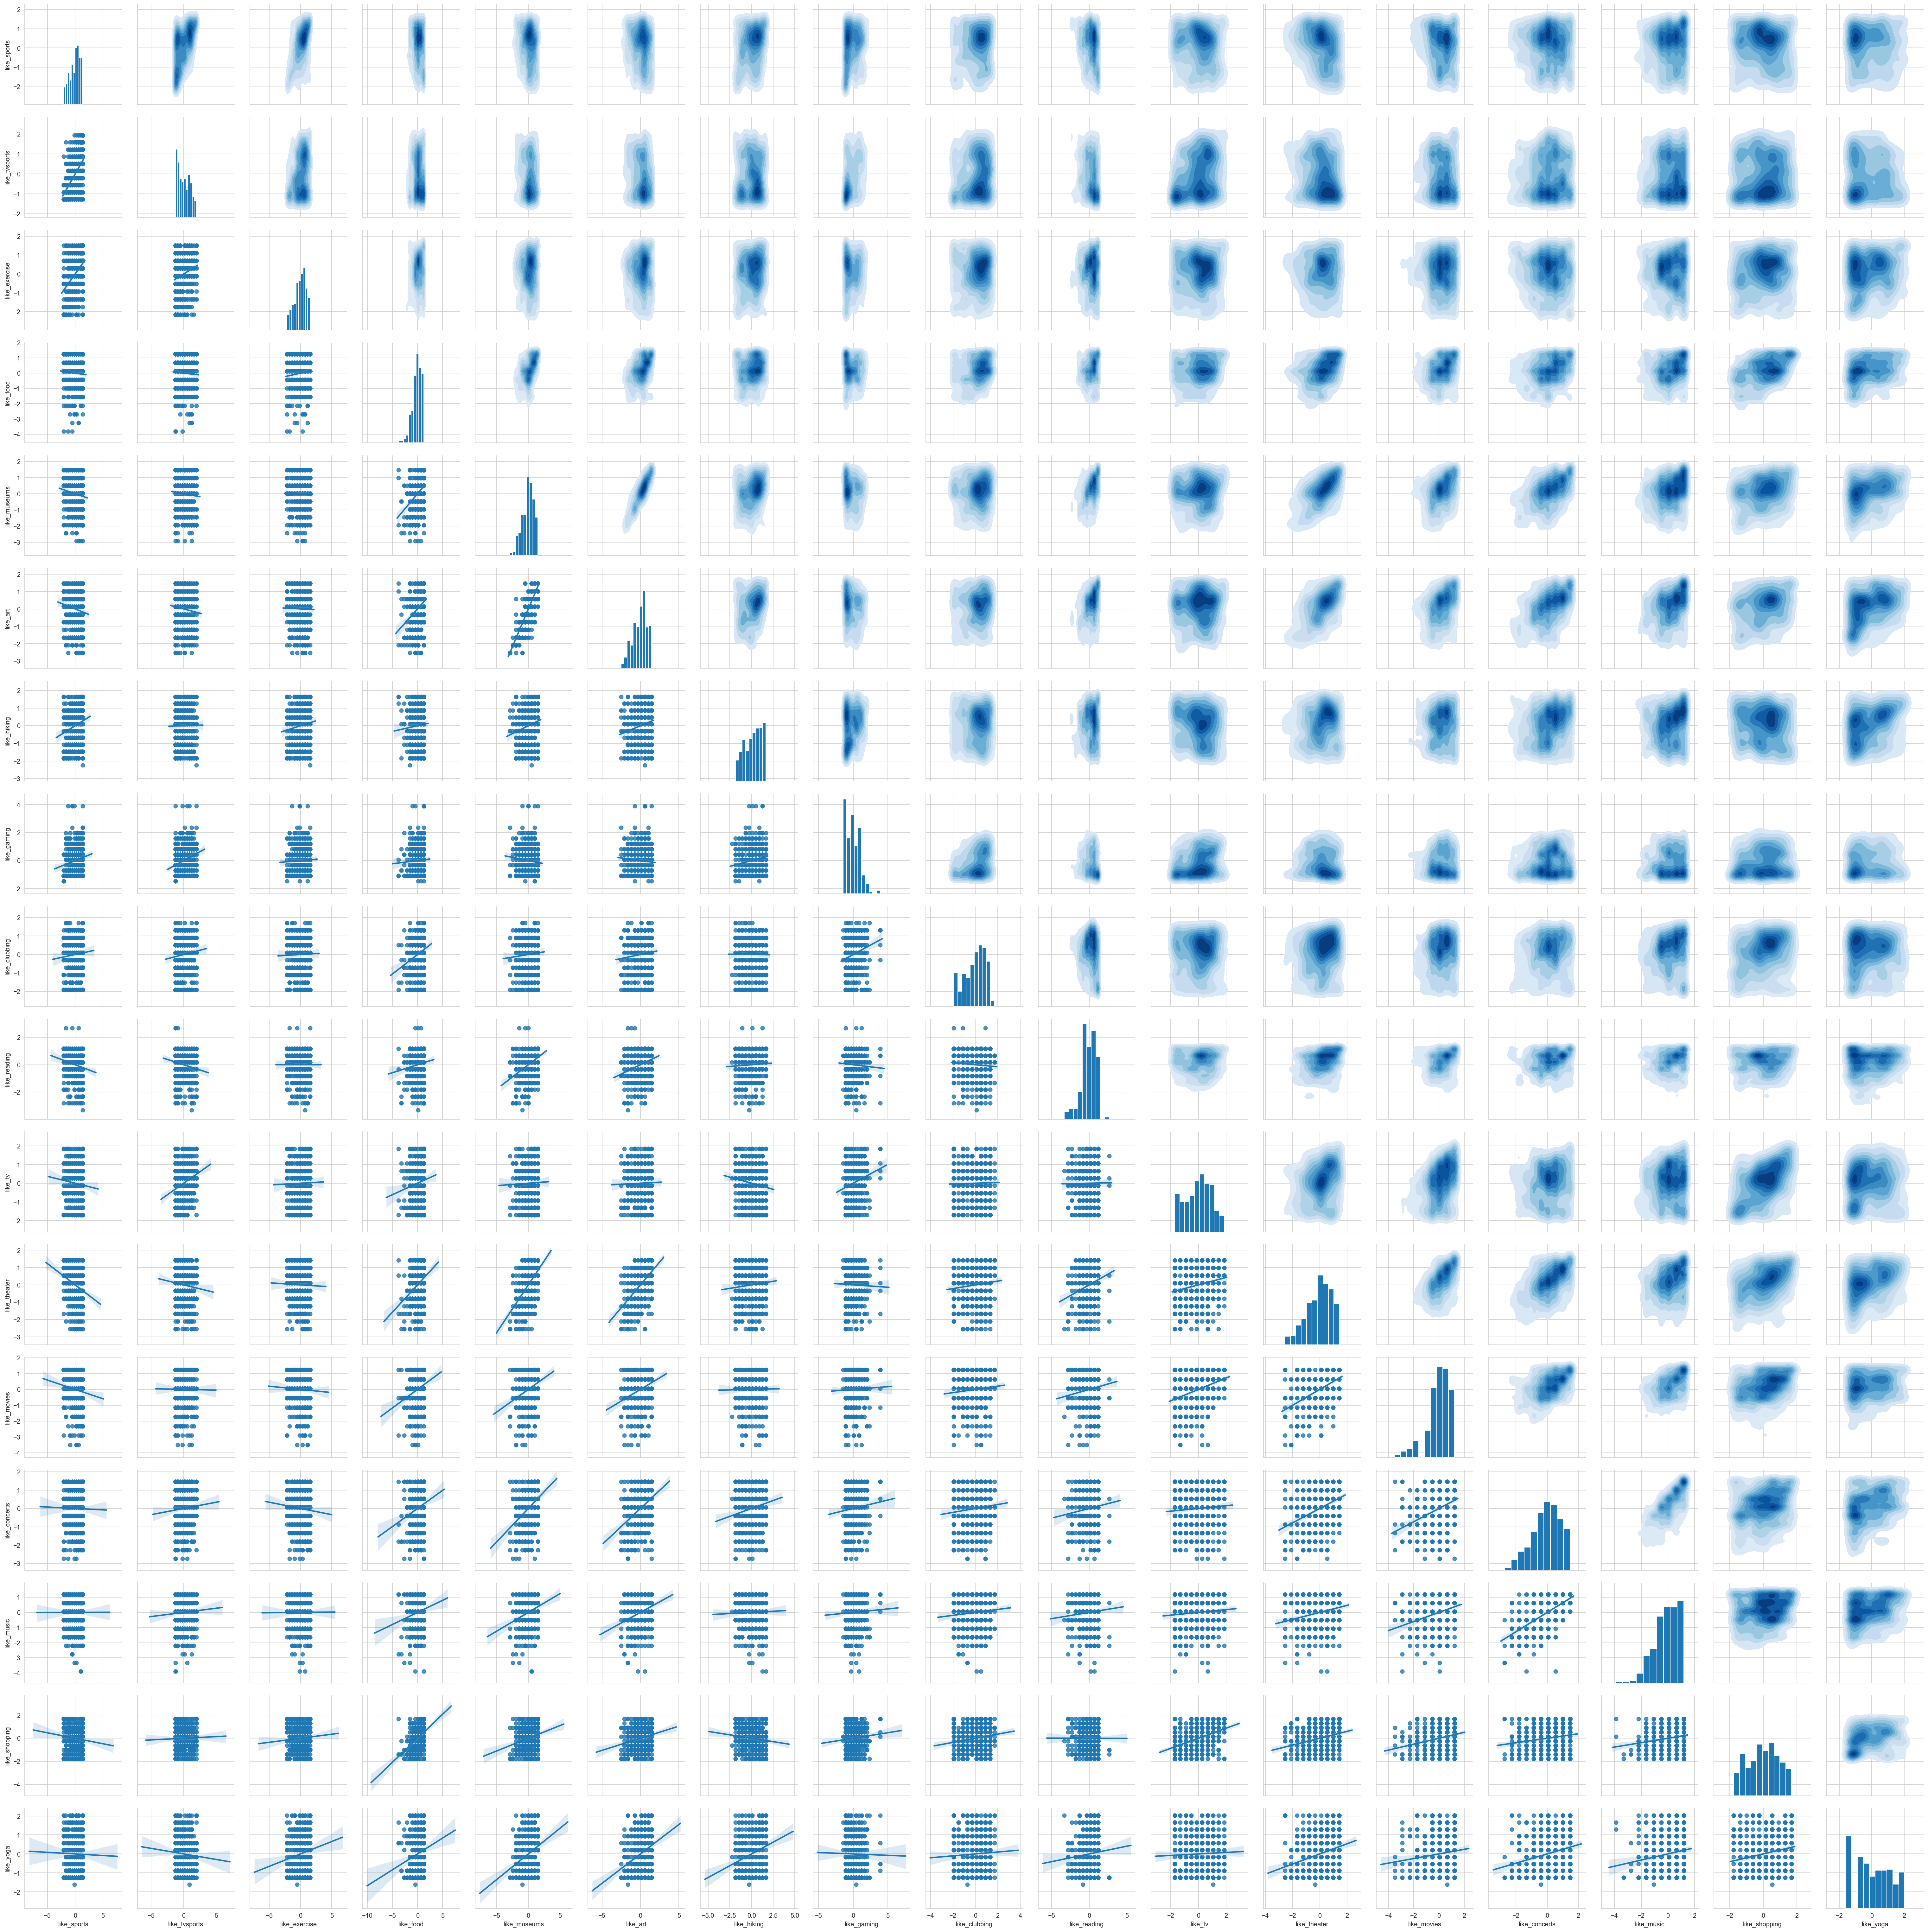

In [39]:
g = sns.PairGrid(preference)

g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

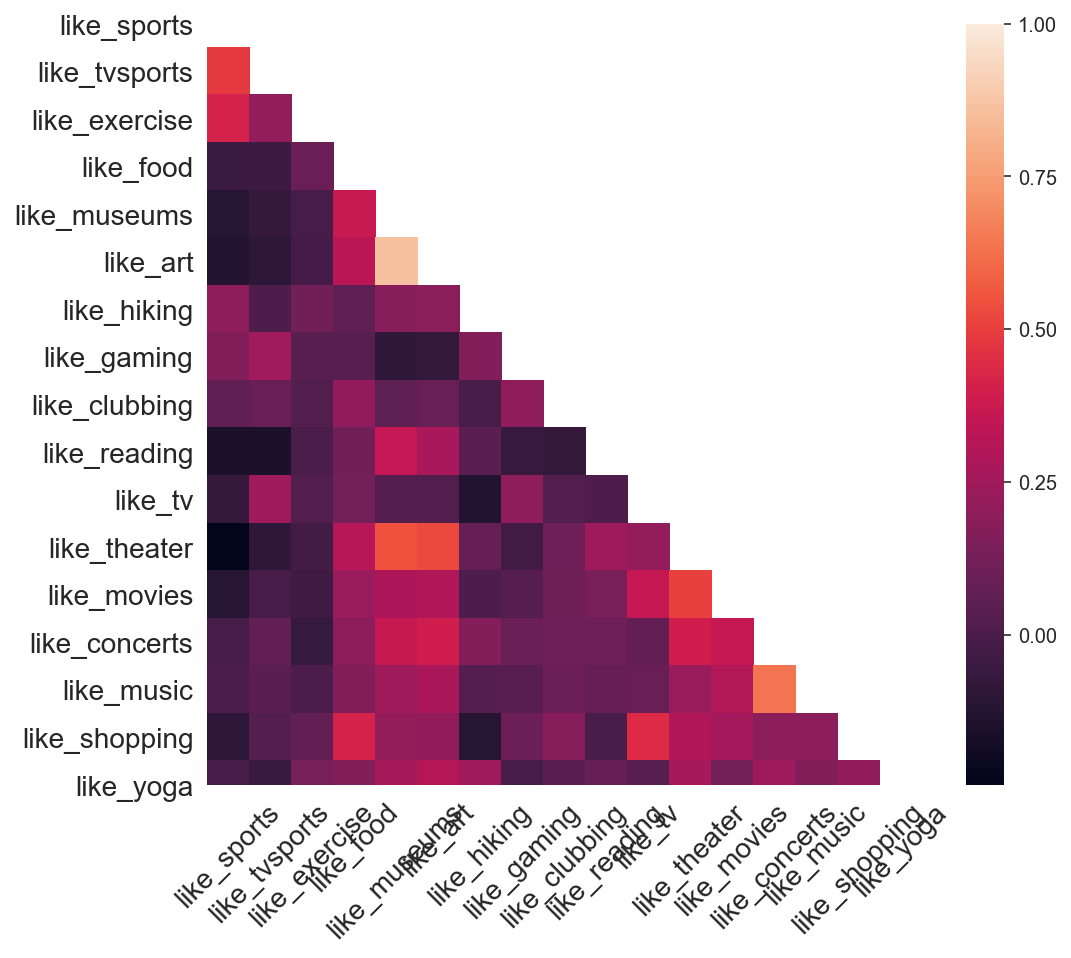

In [40]:
pref_corr = preference.corr()

mask = np.zeros_like(pref_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8,7))

ax = sns.heatmap(pref_corr, mask=mask)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.show()

## PCA

In [41]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
subj_components = subjective_pca.components_

In [45]:
print((subjective_cols, '\n'))
print ('-------------------------------------\n')

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print((pc, 'weighting vector:', subj_components[i]))
    print( '-------------------------------------\n')

(['subjective_attractiveness', 'subjective_sincerity', 'subjective_intelligence', 'subjective_fun', 'subjective_ambition'], '\n')
-------------------------------------

('PC1', 'weighting vector:', array([-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711]))
-------------------------------------

('PC2', 'weighting vector:', array([ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221]))
-------------------------------------

('PC3', 'weighting vector:', array([-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176]))
-------------------------------------

('PC4', 'weighting vector:', array([ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783]))
-------------------------------------

('PC5', 'weighting vector:', array([-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]))
-------------------------------------



In [46]:
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

print(('eigenvalues:', subj_exp_var_eigenvals, '\n'))
print(('explained variance pct:', subj_exp_var_pct))

('eigenvalues:', array([2.15642881, 0.88760955, 0.73684686, 0.72096547, 0.4981493 ]), '\n')
('explained variance pct:', array([0.43128576, 0.17752191, 0.14736937, 0.14419309, 0.09962986]))


In [47]:
subj_to_pcs = subjective_pca.transform(subjective.values)

In [48]:
subj_to_pcs[:,:3]

array([[ 0.67332   ,  0.0343678 , -0.10373029],
       [ 1.34919946,  2.02154958, -2.13681651],
       [-0.94880298, -0.27121403, -0.03920403],
       ...,
       [ 1.27684985,  0.74775641, -0.3676784 ],
       [ 2.37183879, -0.92161414,  0.44827873],
       [ 1.22846879,  0.72770379, -0.34579764]])

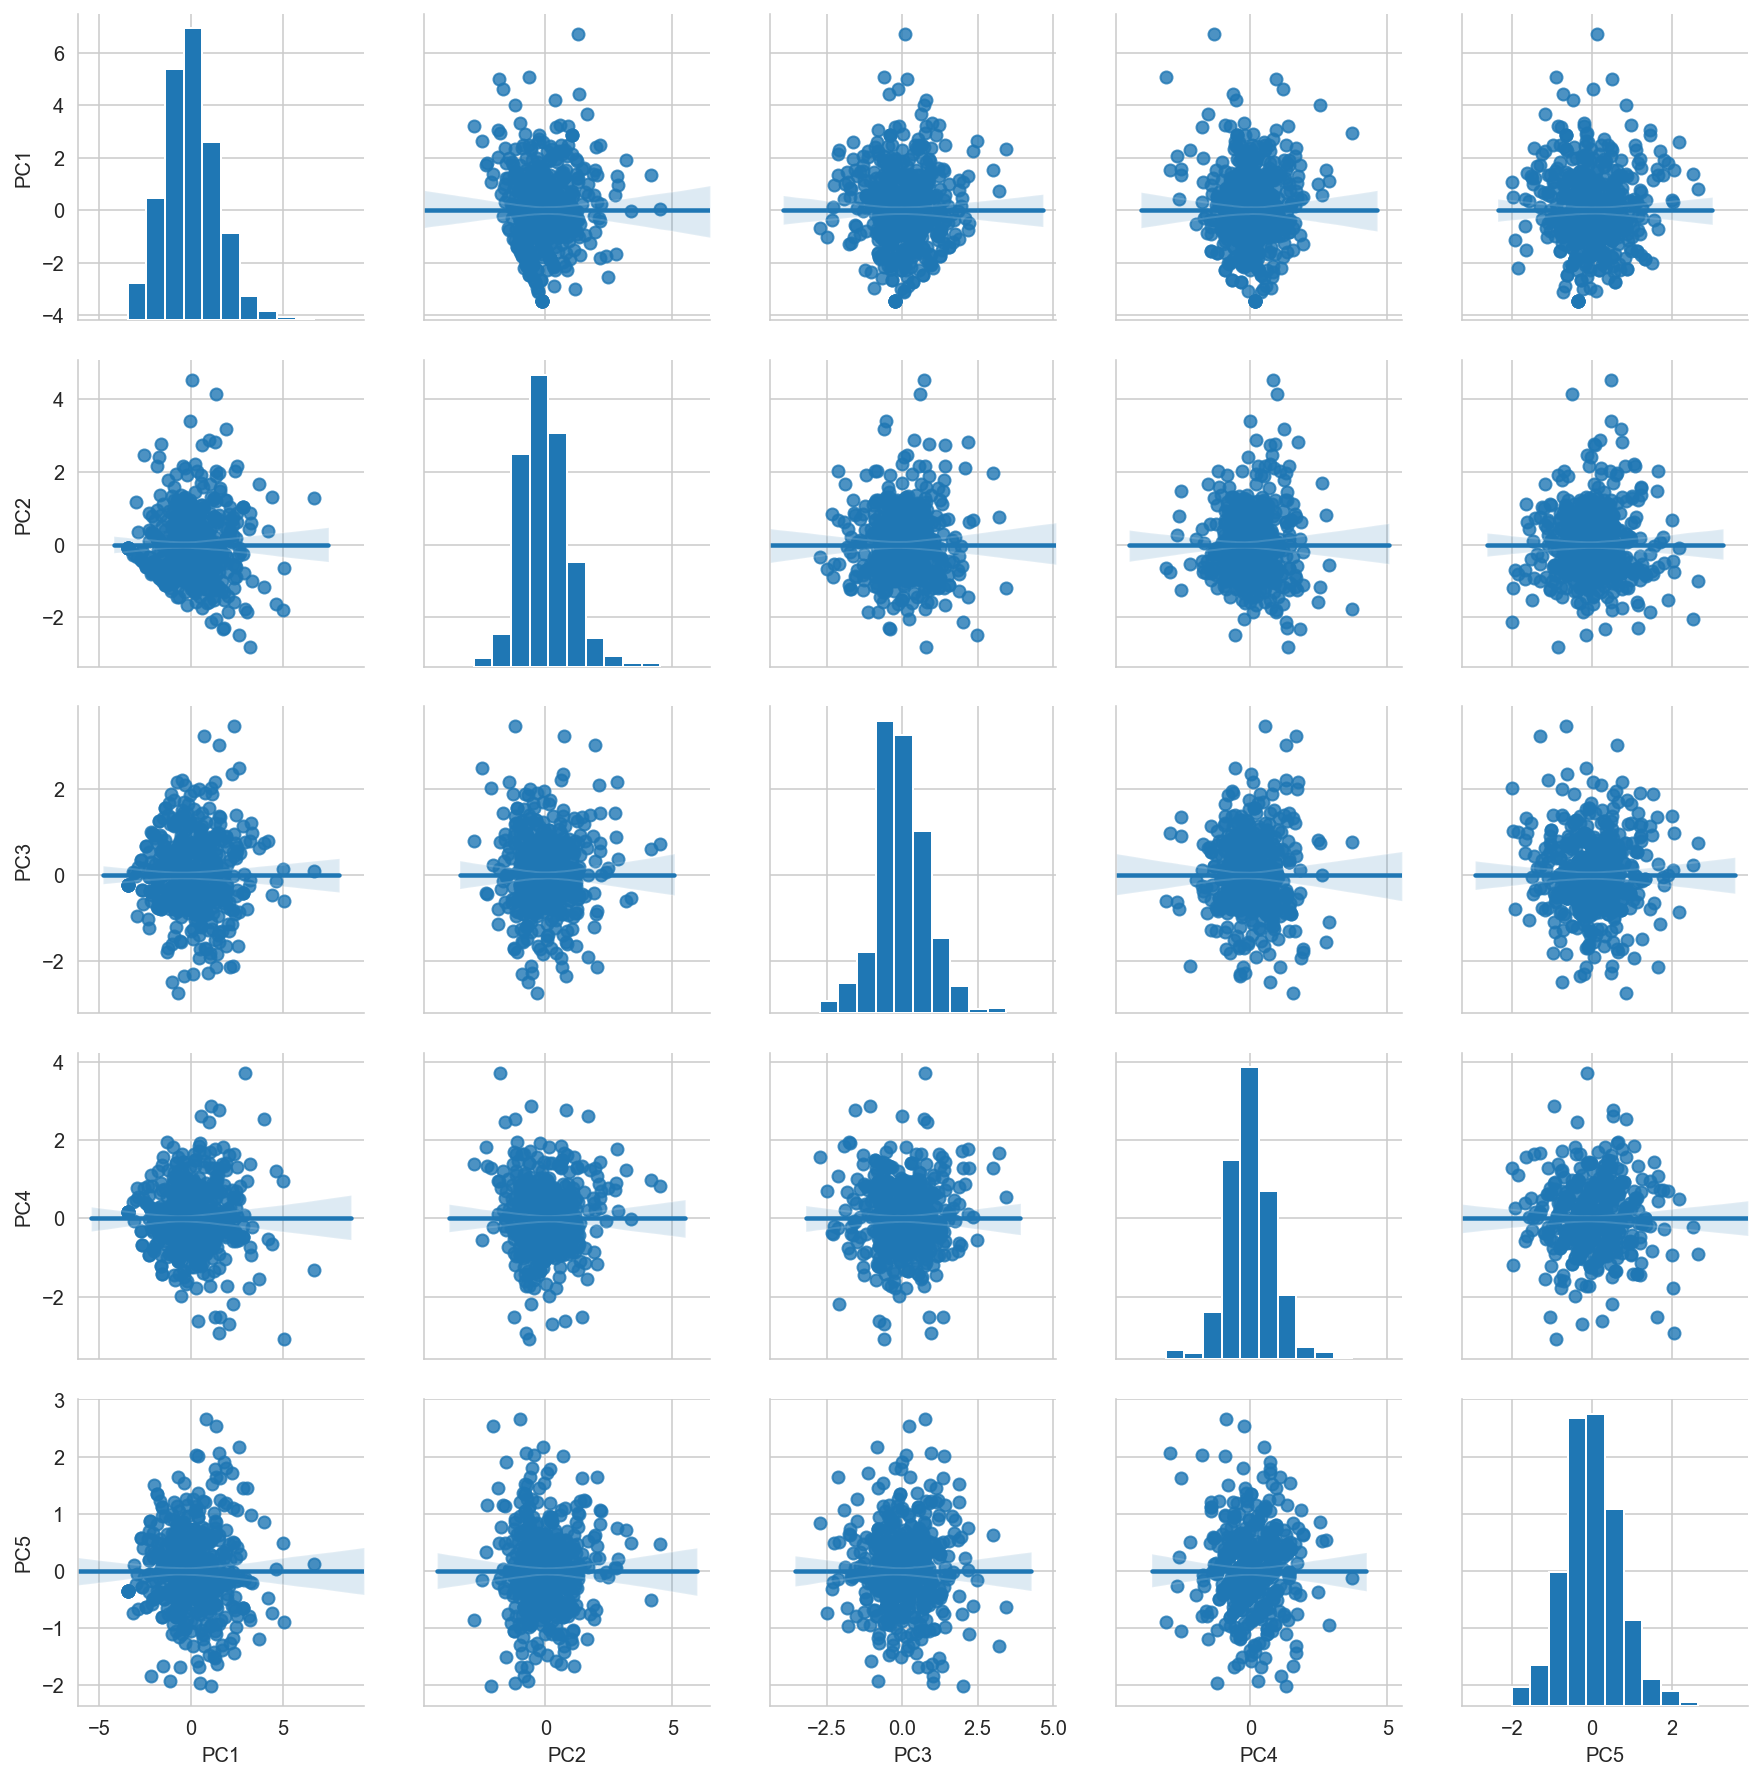

In [49]:
sns.pairplot(pd.DataFrame(subj_to_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg');

In [51]:
preference.columns

Index(['like_sports', 'like_tvsports', 'like_exercise', 'like_food',
       'like_museums', 'like_art', 'like_hiking', 'like_gaming',
       'like_clubbing', 'like_reading', 'like_tv', 'like_theater',
       'like_movies', 'like_concerts', 'like_music', 'like_shopping',
       'like_yoga'],
      dtype='object')

In [52]:
pref_pca = PCA(n_components=5)
pref_pca.fit(preference)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pref_comp = pref_pca.components_

In [54]:
print((pref_pca.explained_variance_ratio_))
print('-------------------------------------\n')

print((sd_like.columns.values))
print('-------------------------------------\n')

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print((pc, 'weighting vector:', pref_comp[i]))
    print('-------------------------------------\n')

[0.22823727 0.12290351 0.09963275 0.07452067 0.06539926]
-------------------------------------

['like_sports' 'like_tvsports' 'like_exercise' 'like_food' 'like_museums'
 'like_art' 'like_hiking' 'like_gaming' 'like_clubbing' 'like_reading'
 'like_tv' 'like_theater' 'like_movies' 'like_concerts' 'like_music'
 'like_shopping' 'like_yoga']
-------------------------------------

('PC1', 'weighting vector:', array([ 0.1078712 ,  0.04283577,  0.00759204, -0.27292535, -0.39728138,
       -0.39633941, -0.08885087, -0.01132272, -0.09884784, -0.17791789,
       -0.13948941, -0.38568526, -0.30352673, -0.32712221, -0.26448863,
       -0.24746852, -0.22152766]))
-------------------------------------

('PC2', 'weighting vector:', array([ 0.47102752,  0.50542952,  0.33349359,  0.0811725 , -0.12414003,
       -0.11549954,  0.11448355,  0.37022641,  0.21760681, -0.21264207,
        0.24595045, -0.07434173,  0.06127856,  0.11342891,  0.12945864,
        0.17856428,  0.04570063]))
----------------------

In [55]:
pref_pcs = pref_pca.transform(preference)

In [56]:
pref_pcs[0:3]

array([[ 2.07788905,  1.60002173,  2.1819037 , -1.1408011 ,  0.56670079],
       [-0.47283316, -1.61377109,  0.05950589,  0.08787182, -1.11813363],
       [ 0.53357861,  0.67422249,  0.84564994,  1.13687225,  0.06216434]])

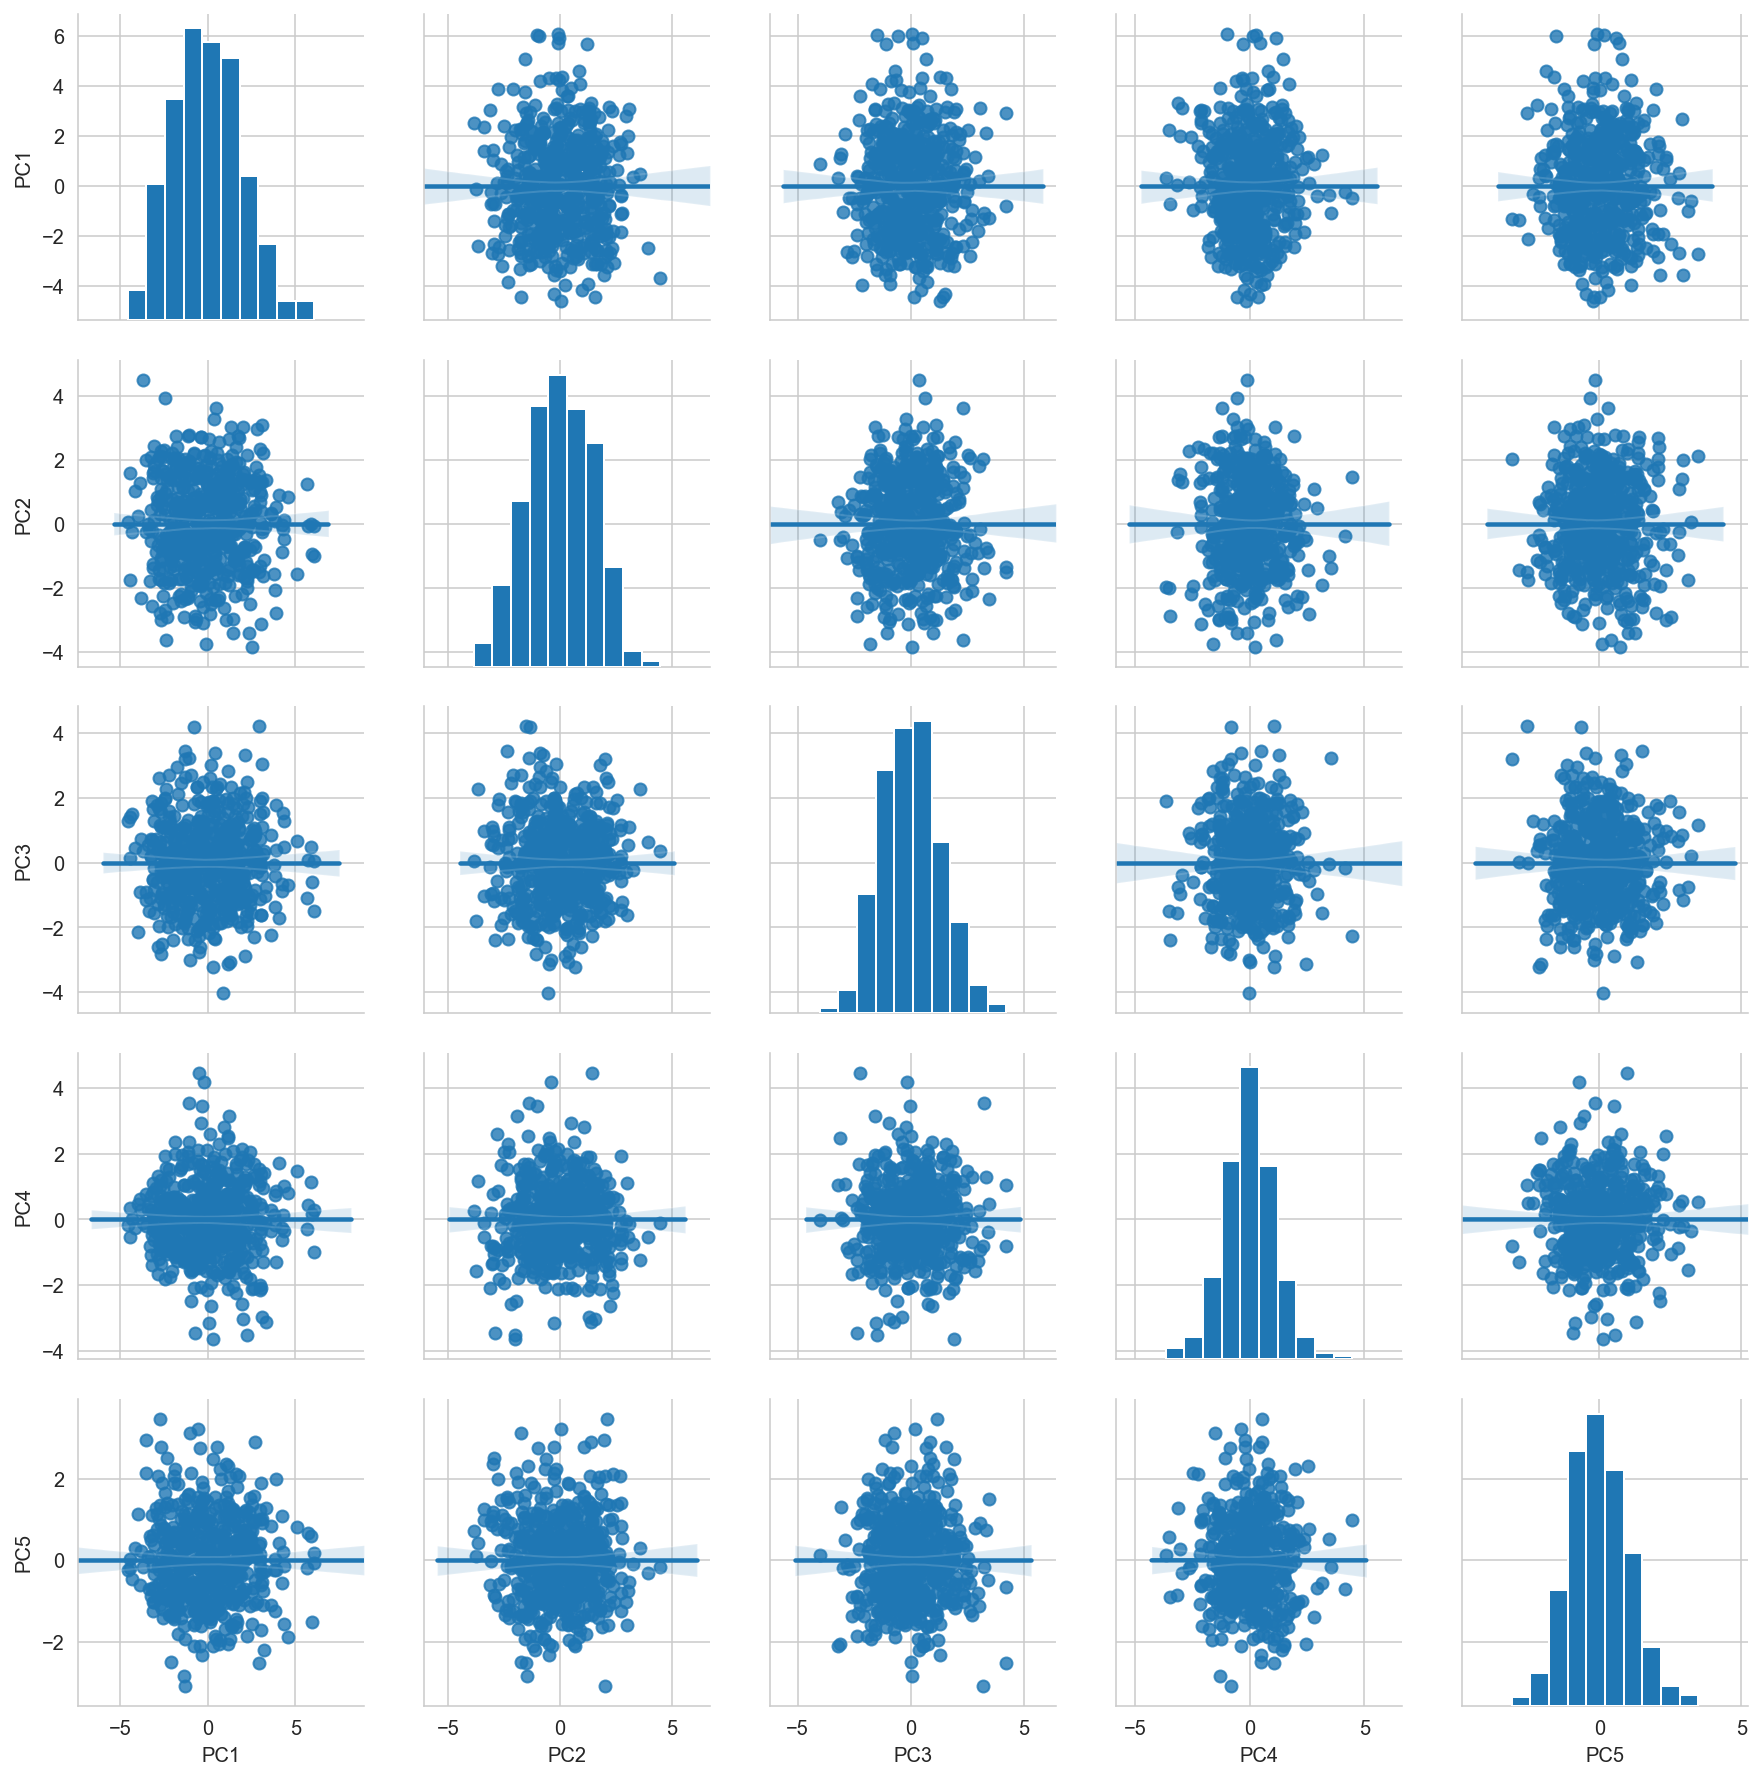

In [57]:
sns.pairplot(pd.DataFrame(pref_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg')

## Model Training

### Predicting if a user 'likes' reading

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [61]:
reading = sd['like_reading'].values

In [64]:
pref_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
sd_like = sd[pref_cols]

In [65]:
linreg = LinearRegression()
original_scores = cross_val_score(linreg, sd_like.values, reading, cv=10)
print((sd_like.columns.values))
print(original_scores)
print((np.mean(original_scores)))

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
[ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]
0.0875247930475668


In [66]:
linreg.fit(sd_like.values, reading)
for coef, var in zip(linreg.coef_, sd_like.columns):
    print((var, coef))

('like_tvsports', -0.0639290630317024)
('like_sports', -0.0477497036383218)
('like_museums', 0.3148118433342068)
('like_theater', 0.06907417026774909)
('like_shopping', -0.07623771396040223)
